In [1]:
data=[1,2,3,4,5,6]
data+[5,5]
data

[1, 2, 3, 4, 5, 6]

In [19]:
len(data)

6

In [17]:
data

[100, 2, 3, 4, 5, 6]

In [9]:
data[0]==min(data)

True

In [12]:
a=round(1.53442,2)

In [13]:
a

1.53

In [14]:
print (a)

1.53


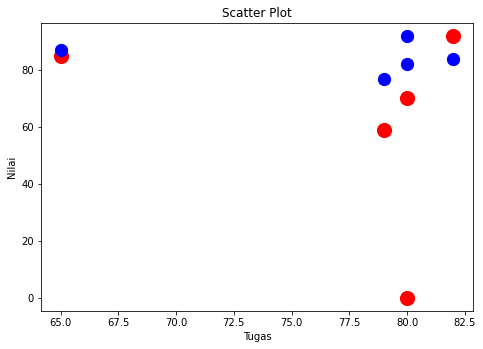

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
tugas = [80,80,65,79,82]
uts = [70,0,85,59,92]
uas = [82,92,87,77,84]

# hubungan tugas dengan uts
ax.scatter(tugas,uts,s=200,c='red')
# hubungan tugas dengan uas
ax.scatter(tugas,uas,s=150,c='blue')

# set label X dan Y
ax.set_xlabel('Tugas')
ax.set_ylabel('Nilai')
ax.set_title('Scatter Plot')

# tampilkan
plt.show()

In [22]:
def abc():
    data=[]
    n=0
    while n<10:
        for i in range (1,10):
            if i%2==0:
                data.append(i)
        data=list([])
        n+=1
    return data

In [23]:
h=abc()
h

[]

In [7]:
from random import randint
data=[randint(0,9) for i in range(5)]
data

[8, 9, 8, 8, 3]

In [25]:
from numpy.random import permutation as rperm
for i in range(10):
    a=rperm(2)
    print(a)

[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[1 0]


In [36]:
import numpy as np
arr = np.arange(12).reshape((4, 3))
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [64]:
def jarak(A,B):
    h=((A[0]-B[0])**2+(A[1]-B[1])**2)**(1/2)
    return h

def crosover1(n,data1,data2):
    data1temp=list(data1[:n])
    data2temp=list(data2[:n])
    for i in range(len(data1)):
        if data2[(i+n)%len(data1)] not in data1[:n]:
            data1temp.append(data2[(i+n)%len(data1)])
        if data1[(i+n)%len(data1)] not in data2[:n]:
            data2temp.append(data1[(i+n)%len(data1)])
    return list([data1temp, data2temp])

def GA(dataset,asal):
    from random import shuffle, randint
    
    # Populasi(dataset,asal)
    from numpy.random import permutation as perm
    banyak=20
    populasi1=list([])
    for i in range(banyak):
        asal2=list([asal])
        lokasi2=perm(dataset)
        asal2.extend(lokasi2)
        populasi1.append(asal2)
    ## return populasi1
    
    beda=True
    while beda:
        # Menghitung fitnes (populasi1)
        populasiterpilih=list([])
        jarak1=list([])
        for i in populasi1:
            jarak2=0
            for j in range (len(i)):
                jarak3=jarak(i[j],i[(j+1)%len(i)])
                jarak2+=jarak3
            jarak1.append(jarak2)
        ## return jarak1
        
        # Seleksi(peluang,datajarak,populasi):
        jarak2=list(jarak1)
        jarak2.sort()
        peluang=0.4
        jmin1=[jarak2[i] for i in range(int(peluang*len(jarak1)))]
        n=0
        for i in range(len(jarak1)):
            if jarak1[i] in jmin1:
                populasiterpilih.append(populasi1[i])
                n+=1
            if n==peluang*len(populasi1):
                break
        
        # Crosover(data,peluang):
        data1=list(populasi1)
        peluang=0.4
        n=randint(0,len(data1[0]))
        for i in range (0,len(data1),2):
            h=crosover1(n,data1[i],data1[(i+1)%len(data1)])
            data1[i],data1[(i+1)%len(data1)]=h[0],h[1]
        ## jarak dari crosover (populasi)
        jarak1=list([])
        for i in data1:
            jarak2=0
            for j in range (len(i)):
                jarak3=jarak(i[j],i[(j+1)%len(i)])
                jarak2+=jarak3
            jarak1.append(jarak2)
        ## seleksi dari crosover (peluang,datajarak,populasi)
        jarak2=list(jarak1)
        jarak2.sort()
        jmin1=[jarak2[i] for i in range(int(peluang*len(jarak1)))]
        n=0
        for i in range(len(jarak1)):
            if jarak1[i] in jmin1:
                populasiterpilih.append(data1[i])
                n+=1
            if n==peluang*len(populasi1):
                break
        
        # Mutasi(data,peluang):
        data1=list(populasi1)
        peluang=0.2
        n=[randint(1,len(data1[0])-1),randint(1,len(data1[0])-1)]
        for i in range (len(data1)):
            data1[i][n[0]],data1[i][n[1]]=data1[i][n[1]],data1[i][n[0]]
        ## jarak dari mutasi (populasi)
        jarak1=list([])
        for i in data1:
            jarak2=0
            for j in range (len(i)):
                jarak3=jarak(i[j],i[(j+1)%len(i)])
                jarak2+=jarak3
            jarak1.append(jarak2)
        ## seleksi dari mutasi (peluang,datajarak,populasi)
        jarak2=list(jarak1)
        jarak2.sort()
        jmin1=[jarak2[i] for i in range(int(peluang*len(jarak1)))]
        n=0
        for i in range(len(jarak1)):
            if jarak1[i] in jmin1:
                populasiterpilih.append(data1[i])
                n+=1
            if n==peluang*len(populasi1):
                break
        
        ## jarak dari populasi terpilih (populasi)
        jarak1=list([])
        for i in populasiterpilih:
            jarak2=0
            for j in range (len(i)):
                jarak3=jarak(i[j],i[(j+1)%len(i)])
                jarak2+=jarak3
            jarak1.append(jarak2)
        jarak1.sort()
        if jarak1[0]==jarak1[9]:
            beda=False
        populasi1=list(populasiterpilih)
    #return populasiterpilih
    return populasiterpilih[randint(0,len(populasiterpilih)-1)]

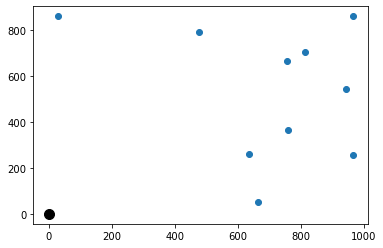

In [37]:
from random import randint, seed
import matplotlib.pyplot as plt
seed(5)
dataset=[[randint(0,999),randint(0,999)] for i in range(10)]
titikasal=[0,0]
plt.scatter([i[0] for i in dataset],[i[1] for i in dataset])
plt.scatter(titikasal[0],titikasal[1],c='black',s=100)

In [38]:
from numpy.random import permutation as perm
a=list(perm(dataset))
for i in range(len(a)):
    a[i]=list(a[i])
b=list(perm(dataset))
for i in range(len(a)):
    b[i]=list(b[i])

In [39]:
print(a)
print(b)

[[476, 794], [814, 707], [664, 53], [965, 255], [29, 860], [637, 261], [757, 667], [759, 367], [944, 542], [965, 861]]
[[965, 861], [637, 261], [759, 367], [944, 542], [814, 707], [476, 794], [664, 53], [29, 860], [757, 667], [965, 255]]


In [40]:
from itertools import permutations as perm
a=[i for i in range(10)]
b=perm(a)
len(list(b))

3628800

In [41]:
def jarak(A,B):
    h=((A[0]-B[0])**2+(A[1]-B[1])**2)**(1/2)
    return h

def crosover1(n,data1,data2):
    data1temp=list(data1[:n])
    data2temp=list(data2[:n])
    for i in range(len(data1)):
        if data2[(i+n)%len(data1)] not in data1[:n]:
            data1temp.append(data2[(i+n)%len(data2)])
        if data1[(i+n)%len(data1)] not in data2[:n]:
            data2temp.append(data1[(i+n)%len(data1)])
    return list([data1temp, data2temp])

# Coretan 3

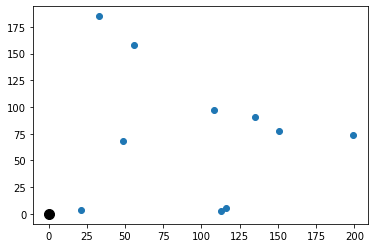

In [117]:
from random import randint, seed
seed(23)
dataset=[[randint(0,199),randint(0,199)] for i in range (10)]
titikasal=[0,0]
import matplotlib.pyplot as plt
plt.scatter([i[0] for i in dataset],[i[1] for i in dataset])
plt.scatter(titikasal[0],titikasal[1],c='black',s=100)

In [118]:
from random import shuffle, randint, random
# Populasi(dataset,asal)
banyak=12
populasi1=list([])
lokasi2=list(dataset)
for i in range(banyak):
    asal2=list([titikasal])
    shuffle(lokasi2)
    asal2.extend(lokasi2)
    populasi1.append(asal2)
print('sukses "populasi1"')
#populasi1

sukses "populasi1"


In [119]:
# jarak dari populasi asal (populasi)
fitnes1=list([])
for i in populasi1:
    jarak2=0
    for j in range (len(i)):
        jarak3=jarak(i[j],i[(j+1)%len(i)])
        jarak2+=jarak3
    fitnes1.append(jarak2)
fitnes1

[918.8625654956065,
 1160.4247877699286,
 1188.1141270737626,
 1278.2337624682227,
 1310.6751607149215,
 1395.778001241161,
 1107.7643593837404,
 1223.6879332372273,
 1313.7621230501722,
 1244.1147357002048,
 1465.4084251193217,
 1394.0850978639714]

In [120]:
populasiterpilih=list([])
# Seleksi(peluang,datajarak,populasi):
for i in range(0,len(jarak1),2):
    if fitnes1[i]<fitnes1[(i+1)]:
        populasiterpilih.append(populasi1[i])
    elif fitnes1[i]>=fitnes1[i+1]:
        populasiterpilih.append(populasi1[i+1])
len(populasiterpilih)

6

In [121]:
r=0.97
r

0.97

In [122]:
# Crosover(data,peluang):
if r<0.95:
    n=randint(0,len(populasiterpilih)-1)
    for i in range (0,len(populasiterpilih),2):
        h=crosover1(n,populasiterpilih[i],populasiterpilih[(i+1)%len(populasiterpilih)])
        populasiterpilih[i],populasiterpilih[(i+1)%len(populasiterpilih)]=h[0],h[1]
len(populasiterpilih)

6

In [123]:
if r<0.01:
    n=[randint(1,len(populasiterpilih[0])-1),randint(1,len(populasiterpilih[0])-1)]
    for i in range (len(populasiterpilih)):
        populasiterpilih[i][n[0]],populasiterpilih[i][n[1]]=populasiterpilih[i][n[1]],populasiterpilih[i][n[0]]
print(n)
len(populasiterpilih)

6


6

In [124]:
fitnes1

[918.8625654956065,
 1160.4247877699286,
 1188.1141270737626,
 1278.2337624682227,
 1310.6751607149215,
 1395.778001241161,
 1107.7643593837404,
 1223.6879332372273,
 1313.7621230501722,
 1244.1147357002048,
 1465.4084251193217,
 1394.0850978639714]

In [125]:
jarak2=list(fitnes1)
jarak2.sort()
jarak2.reverse()
jmax=list(jarak2[:int(len(jarak2)/2)])
n=0
for i in range(len(jarak1)):
    if jarak1[i] in jmax:
        populasi1[i]=populasiterpilih[n]
        n+=1
len(populasi1)

12

In [126]:
asd=[i for i in range(10)]
asd

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [127]:
asd2=list(asd[:5])

In [88]:
asd2

[0, 1, 2, 3, 4]

In [6]:
from random import randint, choice
data=[[randint(1,100),randint(1,100)] for i in range (10)]
a=list([choice(data) for i in range (5)])
a

[[12, 49], [28, 90], [96, 28], [100, 16], [96, 28]]